# Naive Bayes Classifer

Citation: Based upon Zhang, Z (2016) Naive Bayes Classification in R, Annals of Translational Medicine. 4:241

Use the built-in titanic data set

In [75]:
data(Titanic)
t.df= as.data.frame(Titanic)
head(t.df)

Class,Sex,Age,Survived,Freq
1st,Male,Child,No,0
2nd,Male,Child,No,0
3rd,Male,Child,No,35
Crew,Male,Child,No,0
1st,Female,Child,No,0
2nd,Female,Child,No,0


In [76]:
print (Titanic)

, , Age = Child, Survived = No

      Sex
Class  Male Female
  1st     0      0
  2nd     0      0
  3rd    35     17
  Crew    0      0

, , Age = Adult, Survived = No

      Sex
Class  Male Female
  1st   118      4
  2nd   154     13
  3rd   387     89
  Crew  670      3

, , Age = Child, Survived = Yes

      Sex
Class  Male Female
  1st     5      1
  2nd    11     13
  3rd    13     14
  Crew    0      0

, , Age = Adult, Survived = Yes

      Sex
Class  Male Female
  1st    57    140
  2nd    14     80
  3rd    75     76
  Crew  192     20



In [11]:
library(e1071)

# Convert the counts to individual cases, as described in Zhang's paper


# repeats rows by the number given in the selected column and then removes that column from the output data frame

In [80]:
t.df[3, "Freq"]

[1] 35

In [92]:
seq_len(nrow(t.df))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32

In [97]:
t.df[["Freq"]]

[1]   0   0  35   0   0   0  17   0 118 154 387 670   4  13  89   3   5  11  13
[20]   0   1  13  14   0  57  14  75 192 140  80  76  20

In [104]:
rep.int(seq_len(nrow(t.df)), t.df[["Freq"]])

[1]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [25]  3  3  3  3  3  3  3  3  3  3  3  7  7  7  7  7  7  7  7  7  7  7  7  7
  [49]  7  7  7  7  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  [73]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  [97]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [121]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [145]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [169]  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [193] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [217] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [241] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [265] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [289] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [313] 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 [337] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [361] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [385] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [409] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [433] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [457] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [481] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [505] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [529] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [553] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [577] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [601] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [625] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [649] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [673] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 [697] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12
 [721] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [745] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [769] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [793] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [817] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [841] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [865] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [889] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [913] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [937] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [961] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 [985] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1009] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1033] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1057] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1081] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1105] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1129] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1153] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1177] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
[1201] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 1

In [103]:
rep.int(c(3,5),c(2,4))

[1] 3 3 5 5 5 5

In [89]:
# x = input data frame
# C = column name
as.cases = function(x, C) {
    indices = rep.int(seq_len(nrow(x)), x[[C]])
    x[[C]] = NULL # remove frequency column
    x[indices, ] # Extract the rows
}

In [90]:

t.cases=as.cases(t.df, "Freq")
head(t.cases)
print(nrow(t.cases))

,Class,Sex,Age,Survived
3,3rd,Male,Child,No
3.1,3rd,Male,Child,No
3.2,3rd,Male,Child,No
3.3,3rd,Male,Child,No
3.4,3rd,Male,Child,No
3.5,3rd,Male,Child,No


[1] 2201


In [19]:
model=naiveBayes(Survived~., data=t.cases)

# Generate a random sample of 10 test cases

In [22]:
test.data=t.cases[sample(1:nrow(t.cases),10),]
test.data

,Class,Sex,Age,Survived
27.43,3rd,Male,Adult,Yes
29.14,1st,Female,Adult,Yes
12.98,Crew,Male,Adult,No
12.368,Crew,Male,Adult,No
11.379,3rd,Male,Adult,No
10.118,2nd,Male,Adult,No
10.8,2nd,Male,Adult,No
11.75,3rd,Male,Adult,No
29.65,1st,Female,Adult,Yes
12.593,Crew,Male,Adult,No


# make prediction for the 10 test cases

In [24]:
predict(model,test.data)

[1] No  Yes No  No  No  No  No  No  Yes No 
Levels: No Yes

# generate probability of class identification for each test case

In [26]:
predict(model,test.data,type="raw")

No,Yes
0.84661708,0.1533829
0.09927006,0.9007299
0.85522172,0.1447783
0.85522172,0.1447783
0.84661708,0.1533829
0.72478200,0.2752180
0.72478200,0.2752180
0.84661708,0.1533829
0.09927006,0.9007299
0.85522172,0.1447783


# Now repeat the process

# Divide orginal data into test and training set

# use 75% for training, keep 25% for testing

In [35]:
n=nrow(t.cases)
ind=sample(1:n,.75*n)
test=t.cases[-ind,]
train=t.cases[ind,]

In [36]:
c(nrow(train),nrow(test))

[1] 1650  551

# Do Naive Bayes of the training set

In [105]:
model=naiveBayes(Survived~., data=train)

In [106]:
print (model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       No       Yes 
0.6890909 0.3109091 

Conditional probabilities:
     Class
Y            1st        2nd        3rd       Crew
  No  0.08355321 0.09850484 0.35620053 0.46174142
  Yes 0.29629630 0.16569201 0.23976608 0.29824561

     Sex
Y           Male     Female
  No  0.92084433 0.07915567
  Yes 0.49317739 0.50682261

     Age
Y          Child      Adult
  No  0.03518030 0.96481970
  Yes 0.07212476 0.92787524



# Make Predictions on the test set

In [39]:
predictions=predict(model, test)

# Extract Observations from test set

In [42]:
observed=test$Survived

# calculate confusion matrix

In [44]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [47]:
confusionMatrix(observed,predictions)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  317  36
       Yes 113  85
                                          
               Accuracy : 0.7296          
                 95% CI : (0.6904, 0.7663)
    No Information Rate : 0.7804          
    P-Value [Acc > NIR] : 0.9979          
                                          
                  Kappa : 0.3579          
 Mcnemar's Test P-Value : 4.78e-10        
                                          
            Sensitivity : 0.7372          
            Specificity : 0.7025          
         Pos Pred Value : 0.8980          
         Neg Pred Value : 0.4293          
             Prevalence : 0.7804          
         Detection Rate : 0.5753          
   Detection Prevalence : 0.6407          
      Balanced Accuracy : 0.7198          
                                          
       'Positive' Class : No              
                                          

In [107]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [148]:
p=predict(model,test,type="raw")
head(p)
p=p[,2]

No,Yes
0.7499253,0.2500747
0.7499253,0.2500747
0.7499253,0.2500747
0.7499253,0.2500747
0.7499253,0.2500747
0.7499253,0.2500747


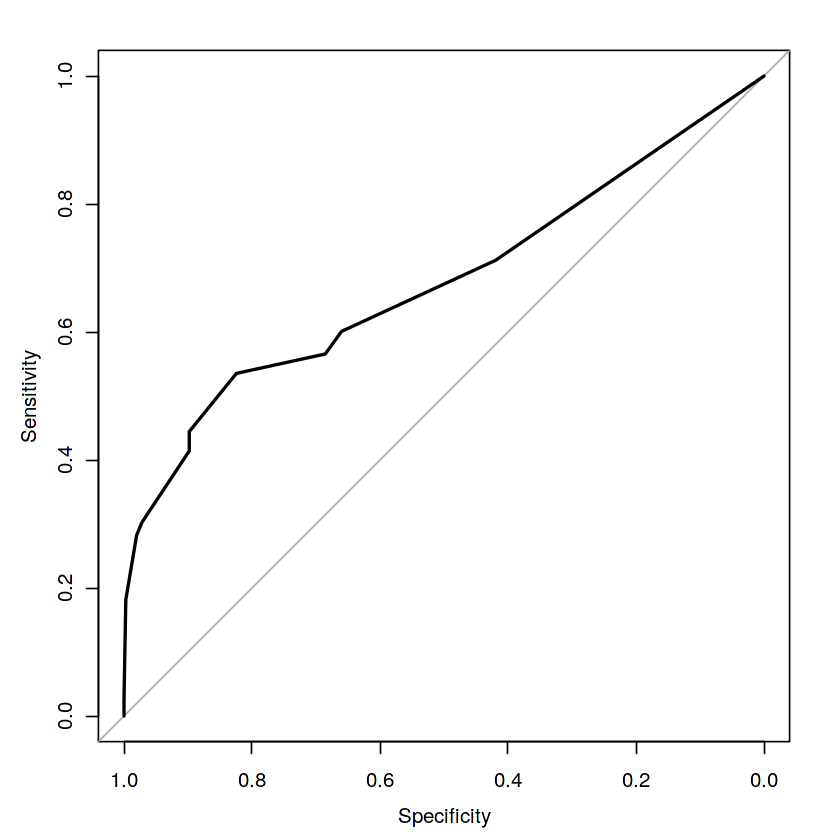

In [149]:
#pdf("ROC-titanic.pdf")
plot(roc(as.numeric(observed), p))
#dev.off()